In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [25]:
# k-means 클러스터링 함수
def k_means(boxes, k, num_iter=100):
    box_areas = (boxes[:,2] - boxes[:,0]) * (boxes[:,3] - boxes[:,1])
    print(box_areas)
    indices = np.argsort(box_areas) # 크기 기준으로 정렬된 index
    print(indices)
    
    # 가장큰 k개의 박스 선택 >> 초기 중심 클러스터 설정
    clusters = boxes[indices[-k:]]
    print(clusters)
    prev_clusters = np.zeros_like(clusters) # 클러스터 중심값 초기화
    
    for _ in range(num_iter):
        # 각 박스와 가까운 클러스터를 연결
        box_clusters = np.argmin(((boxes[:, None] - clusters)**2).sum(axis=2), axis=1) #할당 단계, 거리구하기
        
        # 클러스터의 중심을 다시 계산
        # 업데이트 단계, 해당 클래스에 속한 박스들의 평균값을 계산해서 클러스터의 중심값 업데이트
        for cluster_idx in range(k):
            if np.any(box_clusters == cluster_idx):
                clusters[cluster_idx] = boxes[box_clusters == cluster_idx].mean(axis=0)
                
        # 클러스터의 변화량을 계산하여 수렴 여부 판단
        # 클러스터 알고리즘 반복적 수행 > 클러스터 변화량이 임계치 값보다 작다면 종료 (수렴 ok)
        if np.all(np.abs(prev_clusters - clusters) < 1e-6):
            break
        pre_clusters = clusters.copy()
    return clusters

In [26]:
def plot_boxes(boxes, title='Anchors'):
    fig, ax = plt.subplots(1)
    ax.set_title(title)
    
    # 원본 이미지 크기 (200, 200)
    img_width, img_height = 200, 200
    
    # 이미지 크기에 맞게 앵커 박스 자표 정규화 후 그리기
    for box in boxes:
        x1, y1, x2, y2 = box
        x1, y1 = x1 / img_width, y1 / img_height
        x2, y2 = x2 / img_width, y2 / img_height
        
        width, height = x2 - x1, y2 - y1
        rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.invert_yaxis()
    plt.show()
    

[1600 3000 3000 6300 3000 6600]
[0 1 2 4 3 5]
[[ 30  40  80 100]
 [100  90 150 150]
 [ 20  30  70  90]
 [ 50  60 120 150]
 [ 80  70 140 180]]


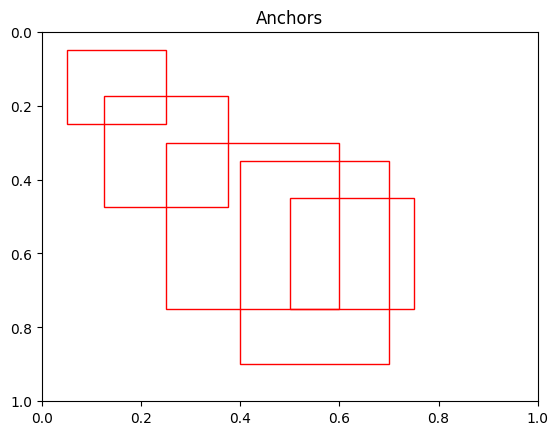

In [27]:
boxes = np.array(([10,10,50,50], [30,40,80,100], [100,90,150,150], [50,60,120,150], [20,30,70,90], [80,70,140,180]))
k=5
anchors = k_means(boxes, k)

plot_boxes(anchors)